# Open pkl file for the output histograms

In [1]:
import awkward as ak
import numpy as np
import coffea
import uproot
import hist
import vector
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from dask.distributed import Client
import matplotlib.pyplot as plt
import pickle

In [2]:
with open("qjetmass_zjets_gen.pkl", "rb") as f:
    output = pickle.load( f )

The `output` pickle file will return a dictionary, where all key-value pairs except `output['cutflow']` are histname-histogram pairs. This last entry is itself a dictionary as well; its keys will be the datasets over different years.

In [3]:
#?output

In [4]:
histnames = output.keys()
datasets = output["cutflow"].keys()

In [5]:
for n, i in enumerate(histnames):
    print(n, i)

0 njet_gen
1 njet_reco
2 ptjet_gen_pre
3 ptjet_mjet_u_gen
4 ptjet_mjet_u_reco
5 ptjet_mjet_g_gen
6 ptjet_mjet_g_reco
7 ptjet_reco_over_gen
8 drjet_reco_gen
9 mz_gen
10 mz_reco
11 mz_reco_over_gen
12 dr_z_jet_gen
13 dr_z_jet_reco
14 dphi_z_jet_gen
15 dphi_z_jet_reco
16 ptasym_z_jet_gen
17 ptasym_z_jet_reco
18 m_u_jet_reco_over_gen
19 m_g_jet_reco_over_gen
20 dr_gen_subjet
21 response_matrix_u
22 response_matrix_g
23 cutflow


In [6]:
for i in datasets:
    print(i)

UL18NanoAODv9
UL17NanoAODv9
UL16NanoAODv9


In [7]:
output['cutflow']['UL18NanoAODv9']

defaultdict(int,
            {'all events': 91880250,
             'weights cut': 89407264,
             'oneGenJet': 47051101,
             'twoGen_ee': 7554478,
             'twoGen_mm': 12542671,
             'twoGen_leptons': 20096660,
             'z_gen_pt': 12168376,
             'z_gen_jet_dphi': 42125591,
             'z_pt_asym_gen_sel': 16998482,
             'all_gen_cuts': 5284736,
             'twoReco_ee': 4255270,
             'twoReco_mm': 8327095,
             'twoReco_leptons': 12549425,
             'z_reco_pt': 7151470,
             'oneRecoJet': 36519801,
             'jet_genjet_matching_cuts': 36485013,
             'reco_preselection': 1879736,
             'z_dphi_reco_sel': 21459429,
             'z_pt_asym_reco_sel': 5712929,
             'final_selection': 1763929})

## Normalize all of the histograms to the sum of the number of events

In [8]:
for ihist,ihistname in enumerate(histnames):
    if ihistname == "cutflow" : continue
    #print(ihist, ihistname)
    for i,dataset in enumerate(datasets) :
        #print(i,dataset)
        if np.sum(output[ihistname].values(flow=True)) > 0:
            output[ihistname].view(flow=True)[i] /= output["cutflow"][dataset]['all events']

## Make plots

Start by plotting the histograms for keys 0-8 from `output` for all their available axes.

#### njet

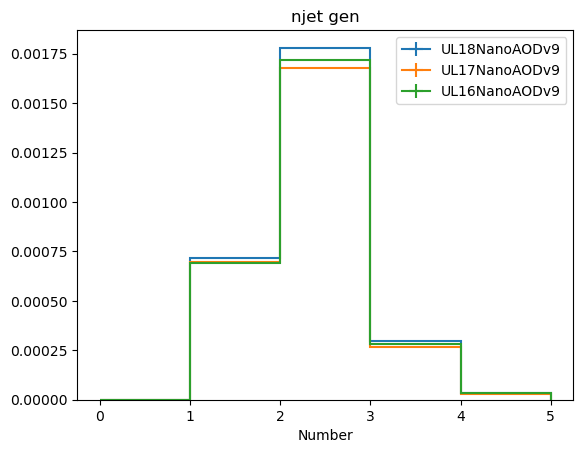

In [9]:
output['njet_gen'].plot()
plt.title('njet gen')
plt.legend()
plt.show()

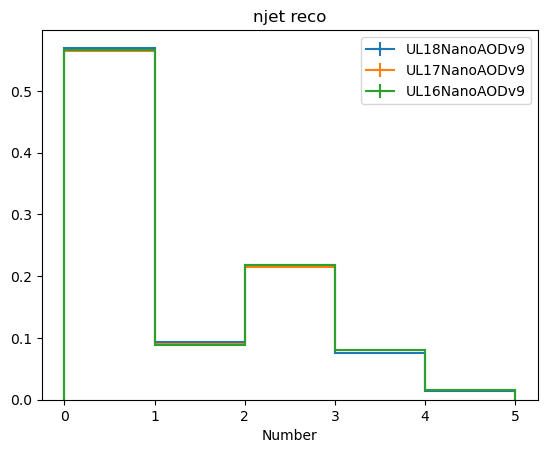

In [10]:
output['njet_reco'].plot()
plt.title('njet reco')
plt.legend()
plt.show()

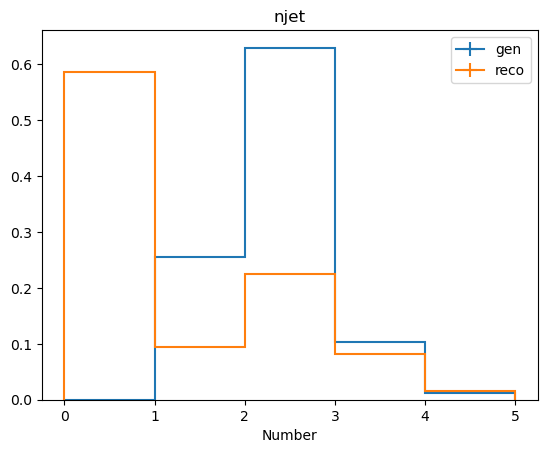

In [11]:
output['njet_gen'].project('n').plot(label='gen', density=True)
output['njet_reco'].project('n').plot(label='reco', density=True)
plt.title('njet')
plt.legend()
plt.show()

#### ptjet_gen_pre

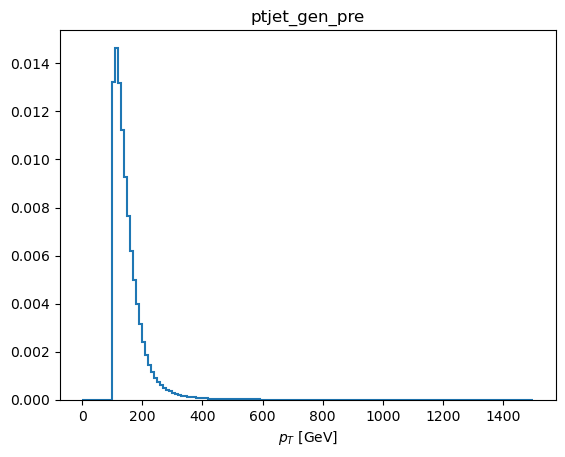

In [12]:
output['ptjet_gen_pre'].project('pt').plot(density=True)
plt.title('ptjet_gen_pre')
plt.show()

#### ptjet_mjet_u

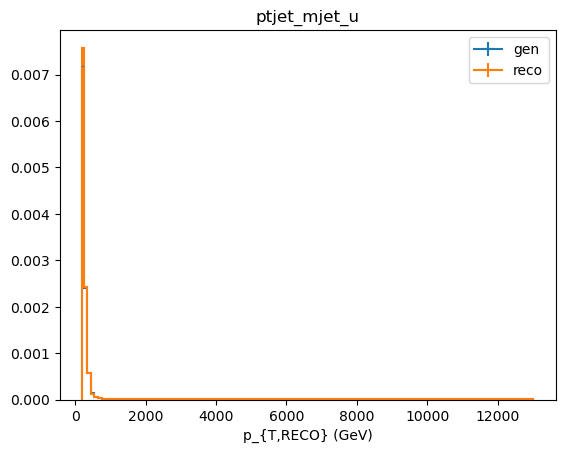

In [13]:
output['ptjet_mjet_u_gen'].project('ptgen').plot(label='gen', density=True)
output['ptjet_mjet_u_reco'].project('ptreco').plot(label='reco', density=True)
plt.title('ptjet_mjet_u')
plt.legend()
plt.show()

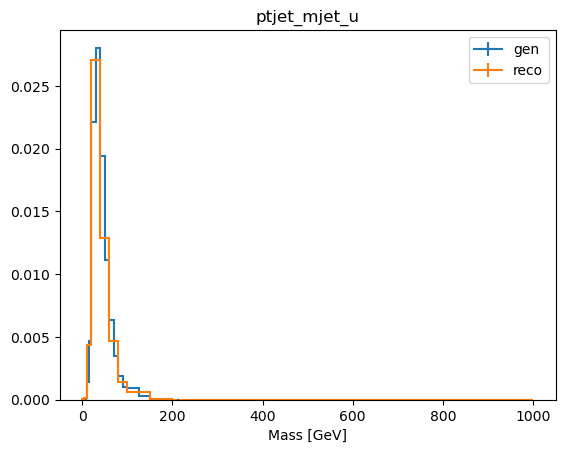

In [14]:
output['ptjet_mjet_u_gen'].project('mgen').plot(label='gen', density=True)
output['ptjet_mjet_u_reco'].project('mreco').plot(label='reco', density=True)
plt.title('ptjet_mjet_u')
plt.legend()
plt.show()

#### ptjet_mjet_g

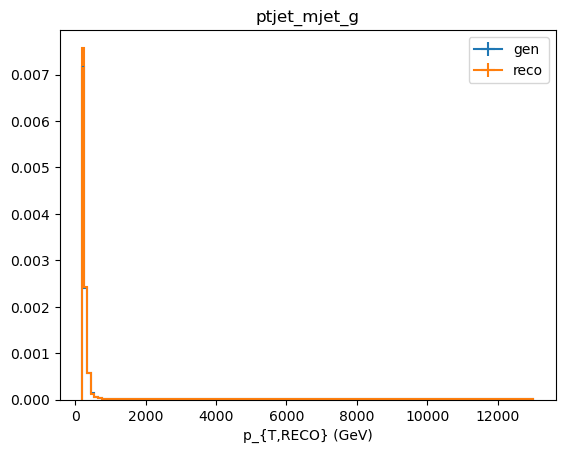

In [15]:
output['ptjet_mjet_g_gen'].project('ptgen').plot(label='gen', density=True)
output['ptjet_mjet_g_reco'].project('ptreco').plot(label='reco', density=True)
plt.title('ptjet_mjet_g')
plt.legend()
plt.show()

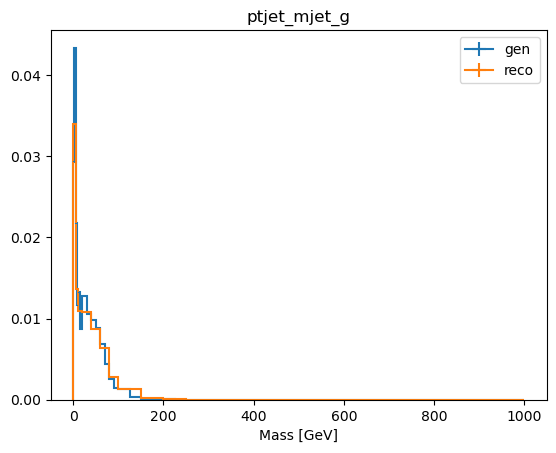

In [16]:
output['ptjet_mjet_g_gen'].project('mgen').plot(label='gen', density=True)
output['ptjet_mjet_g_reco'].project('mreco').plot(label='reco', density=True)
plt.title('ptjet_mjet_g')
plt.legend()
plt.show()

#### ptjet_reco_over_gen

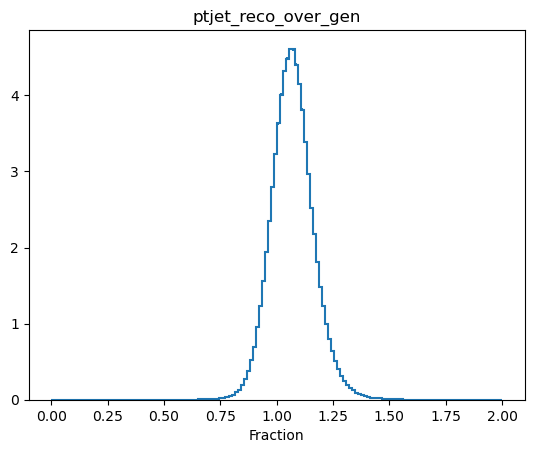

In [17]:
output['ptjet_reco_over_gen'].project('frac').plot(density=True)
plt.title('ptjet_reco_over_gen')
plt.show()

#### drjet_reco_gen

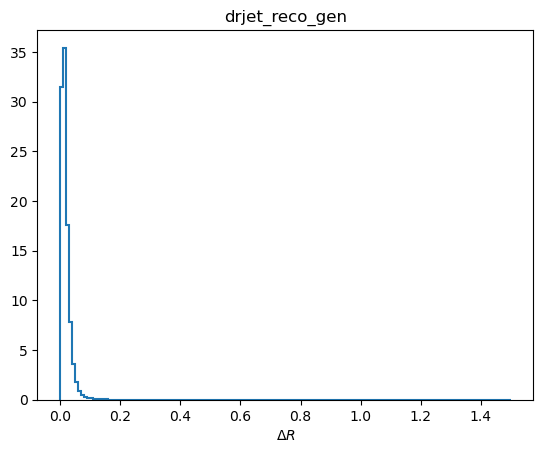

In [18]:
output['drjet_reco_gen'].project('dr').plot(density=True)
plt.title('drjet_reco_gen')
plt.show()

We skip plotting keys 9-11 for now, as these deal with m_z histograms; we will focus on these during binning.

#### dr_z_jet

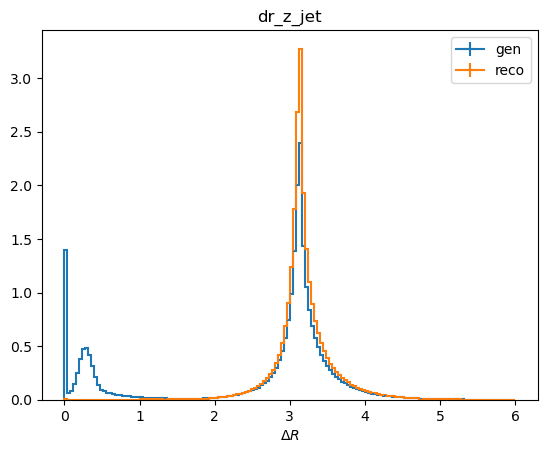

In [19]:
output['dr_z_jet_gen'].project('dr').plot(label='gen', density=True)
output['dr_z_jet_reco'].project('dr').plot(label='reco', density=True)
plt.title('dr_z_jet')
plt.legend()
plt.show()

#### dphi_z_jet

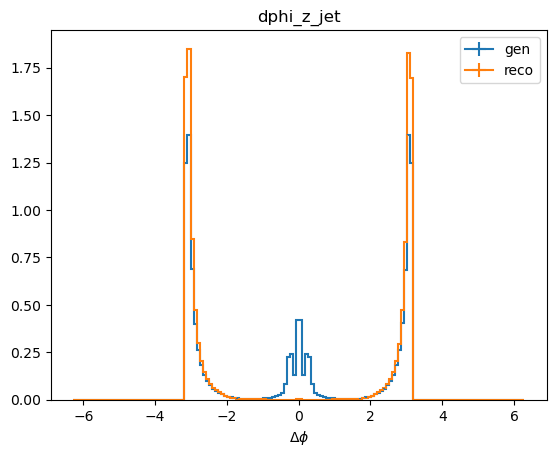

In [20]:
output['dphi_z_jet_gen'].project('dphi').plot(label='gen', density=True)
output['dphi_z_jet_reco'].project('dphi').plot(label='reco', density=True)
plt.title('dphi_z_jet')
plt.legend()
plt.show()

#### ptasym_z_jet

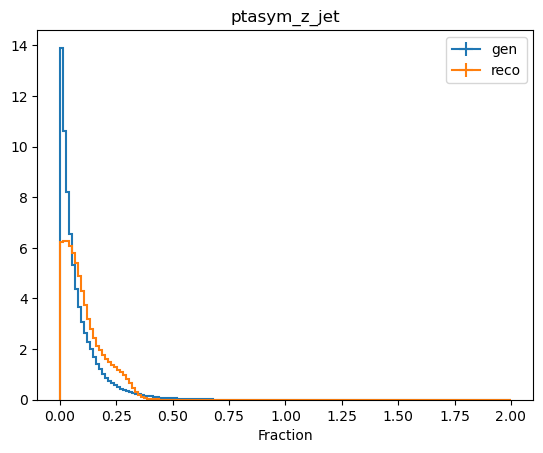

In [21]:
output['ptasym_z_jet_gen'].project('frac').plot(label='gen', density=True)
output['ptasym_z_jet_reco'].project('frac').plot(label='reco', density=True)
plt.title('ptasym_z_jet')
plt.legend()
plt.show()

#### m_u_jet_reco_over_gen and m_g_jet_reco_over_gen

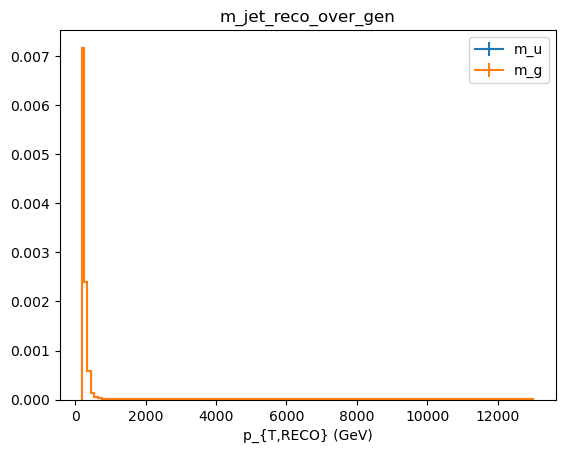

In [22]:
output['m_u_jet_reco_over_gen'].project('ptgen').plot(label='m_u', density=True)
output['m_g_jet_reco_over_gen'].project('ptgen').plot(label='m_g', density=True)
plt.title('m_jet_reco_over_gen')
plt.legend()
plt.show()

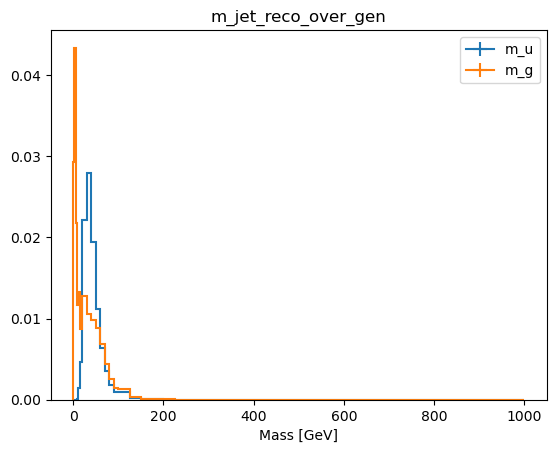

In [23]:
output['m_u_jet_reco_over_gen'].project('mgen').plot(label='m_u', density=True)
output['m_g_jet_reco_over_gen'].project('mgen').plot(label='m_g', density=True)
plt.title('m_jet_reco_over_gen')
plt.legend()
plt.show()

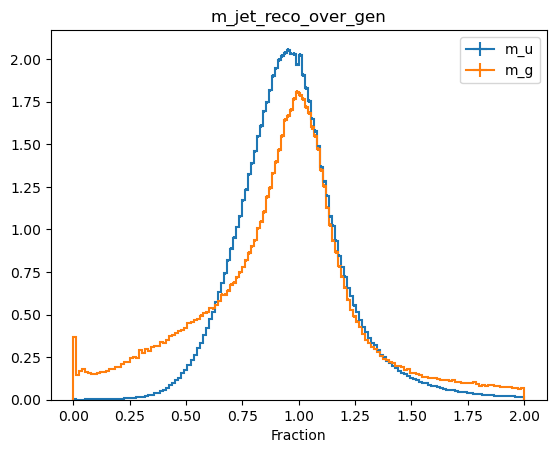

In [24]:
output['m_u_jet_reco_over_gen'].project('frac').plot(label='m_u', density=True)
output['m_g_jet_reco_over_gen'].project('frac').plot(label='m_g', density=True)
plt.title('m_jet_reco_over_gen')
plt.legend()
plt.show()

#### dr_gen_subjet

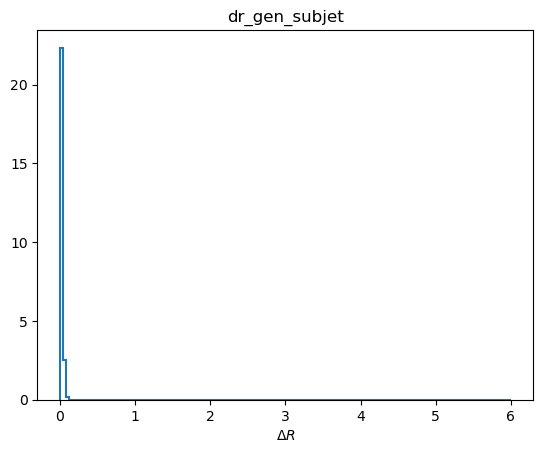

In [25]:
output['dr_gen_subjet'].project('dr').plot(density=True)
plt.title('dr_gen_subjet')
plt.show()

## Binning

#### mz

Now we start plotting the mz histograms and concentrate on them; eventually we will want to fit them to a curve.

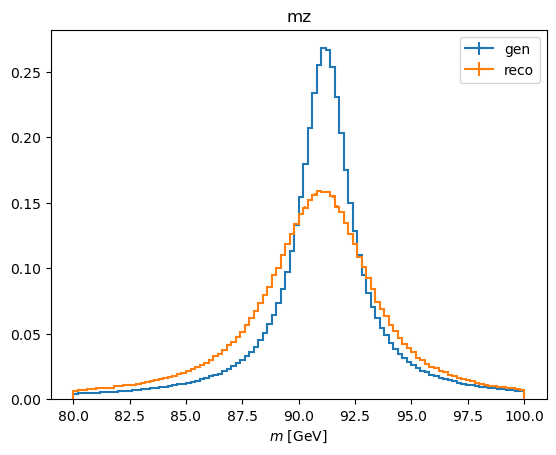

In [26]:
output['mz_gen'].project('mass').plot(label='gen', density=True)
output['mz_reco'].project('mass').plot(label='reco', density=True)
plt.title('mz')
plt.legend()
plt.show()

#### mz_reco_over_gen

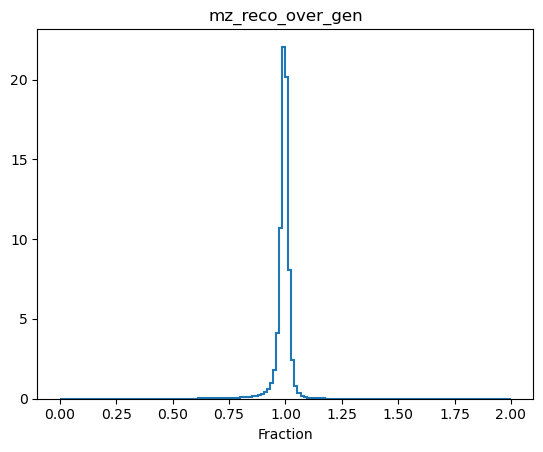

In [27]:
output['mz_reco_over_gen'].project('frac').plot(density=True)
plt.title('mz_reco_over_gen')
plt.show()

Setting up the bins, centers, and widths for the mz histograms.

In [28]:
hist = output['mz_reco_over_gen']

ax_names = hist.axes.name

dataset_edges = hist.axes[0].edges
frac_edges = hist.axes[1].edges

dataset_centers = hist.axes[0].centers
frac_centers = hist.axes[1].centers

dataset_widths = hist.axes[0].widths
frac_widths = hist.axes[1].widths

In [29]:
print(f'Ax Names:\n\n{ax_names}\n')
print(f'Ax Edges:\n\n{dataset_edges}\n\n{frac_edges}\n')
print(f'Ax Centers:\n\n{dataset_centers}\n\n{frac_centers}\n')
print(f'Ax Widths:\n\n{dataset_widths}\n\n{frac_widths}')

Ax Names:

('dataset', 'frac')

Ax Edges:

[0. 1. 2. 3.]

[0.         0.01333333 0.02666667 0.04       0.05333333 0.06666667
 0.08       0.09333333 0.10666667 0.12       0.13333333 0.14666667
 0.16       0.17333333 0.18666667 0.2        0.21333333 0.22666667
 0.24       0.25333333 0.26666667 0.28       0.29333333 0.30666667
 0.32       0.33333333 0.34666667 0.36       0.37333333 0.38666667
 0.4        0.41333333 0.42666667 0.44       0.45333333 0.46666667
 0.48       0.49333333 0.50666667 0.52       0.53333333 0.54666667
 0.56       0.57333333 0.58666667 0.6        0.61333333 0.62666667
 0.64       0.65333333 0.66666667 0.68       0.69333333 0.70666667
 0.72       0.73333333 0.74666667 0.76       0.77333333 0.78666667
 0.8        0.81333333 0.82666667 0.84       0.85333333 0.86666667
 0.88       0.89333333 0.90666667 0.92       0.93333333 0.94666667
 0.96       0.97333333 0.98666667 1.         1.01333333 1.02666667
 1.04       1.05333333 1.06666667 1.08       1.09333333 1.10666667
 1.1

In [30]:
hist_np = hist.to_numpy()
dataset_count_np = hist_np[0]
dataset_count_np.shape

(3, 150)

In [31]:
hist_frac = np.sum(dataset_count_np)
hist_frac0 = np.sum(dataset_count_np, axis=0)
hist_frac1 = np.sum(dataset_count_np, axis=1)

In [32]:
print(hist_frac)
print(hist_frac0)
print(hist_frac1)

0.0017404282842856352
[2.66943505e-07 1.14054920e-07 4.62229459e-08 4.67235921e-08
 1.85702680e-08 1.19841281e-08 1.61340072e-08 1.82147357e-08
 7.33085529e-09 5.86063300e-09 8.32348120e-09 9.49967600e-09
 6.47873440e-09 5.38147952e-09 5.31683512e-09 3.98330092e-09
 4.11810624e-09 5.22545360e-09 4.90490607e-09 3.62279821e-09
 6.94813809e-09 4.92456521e-09 1.22465091e-08 4.53307617e-09
 6.65564639e-09 5.34410419e-09 6.65647427e-09 6.95129771e-09
 1.09180346e-08 1.29382801e-08 1.90403173e-08 1.33613097e-08
 2.27257738e-08 2.18526320e-08 3.22512454e-08 4.17503228e-08
 5.61557707e-08 7.52944130e-08 9.14888976e-08 1.01873128e-07
 1.27050022e-07 1.45468766e-07 1.78031371e-07 2.16437944e-07
 2.31743300e-07 2.60794213e-07 3.41479502e-07 4.04323839e-07
 4.35385869e-07 4.37478056e-07 5.84137487e-07 5.86881936e-07
 6.75802884e-07 8.51307558e-07 8.85568147e-07 1.00217896e-06
 1.11727048e-06 1.37130245e-06 1.43360617e-06 1.61709542e-06
 1.95510467e-06 2.15284150e-06 2.56509190e-06 3.05533464e-06
 3

## Curve Fitting to a Gaussian

In [33]:
from scipy.optimize import curve_fit

In [34]:
def gaussian_function(x, amplitude, mean, standard_dev):
    return amplitude * np.exp(- (x - mean)**2 / (2. * standard_dev**2))

In [35]:
data = np.random.normal(loc=10, scale=5, size=15000)
bin_heights, bin_borders = np.histogram(data, bins='auto')
bin_widths = np.diff(bin_borders)
bin_centers = bin_borders[:-1] + bin_widths / 2

In [36]:
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
popt, pcov = curve_fit(gaussian_function, xdata=bin_centers, ydata=bin_heights, p0=[1., 0., 1.])

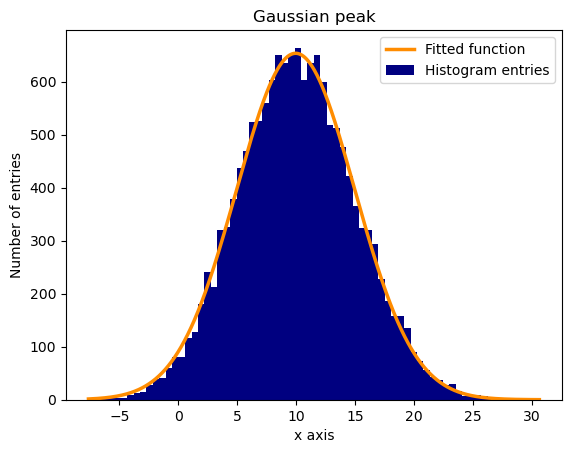

In [37]:
plt.bar(bin_centers, bin_heights, width=bin_widths, color='navy', label=r'Histogram entries')
plt.plot(x_interval_for_fit, gaussian_function(x_interval_for_fit, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')
plt.xlabel(r'x axis')
plt.ylabel(r'Number of entries')
plt.title(r'Gaussian peak')
plt.legend(loc='best')
plt.show()

In [38]:
#for i in range(3):
#    plt.stairs(hist_np[i]/np.sum(hist_np[i]), mz_edges, label='dsad')
#    plt.xlabel("Response")
#    plt.ylabel("Counts (Normalised)")
#    plt.legend()
#    plt.show()